Wall time: 18 ms
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Book_Name    996 non-null    object
 1   book_id      996 non-null    object
 2   guten_genre  996 non-null    object
 3   Author_Name  996 non-null    object
dtypes: object(4)
memory usage: 287.5 KB
                                           Book_Name       book_id  \
0  The Mystery of the Boule Cabinet: A Detective ...  pg10067.epub   
1                                          The Pupil   pg1032.epub   
2                                     At Love's Cost  pg10379.epub   
3                             The Heart of the Range  pg10473.epub   
4                        The Worshipper of the Image  pg10812.epub   

             guten_genre               Author_Name  
0  Detective and Mystery  Stevenson| Burton Egbert  
1               Literary              James| Henry  
2           

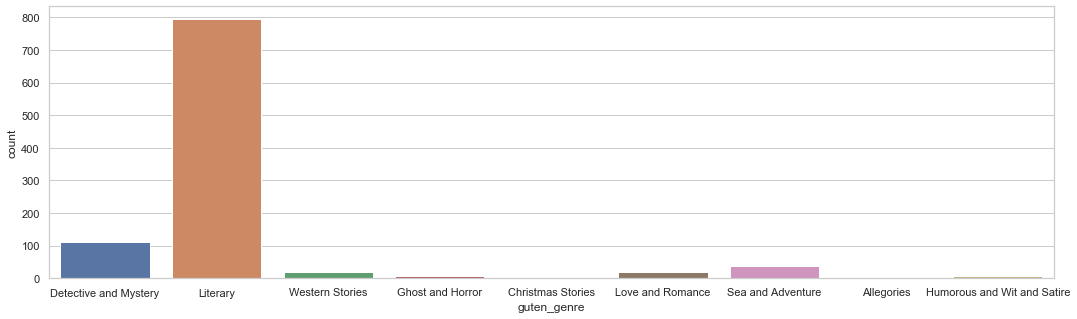

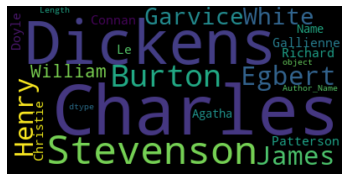

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   File_Name  50 non-null     object
 1   Data       50 non-null     object
 2   FileNo     50 non-null     int32 
dtypes: int32(1), object(2)
memory usage: 21.3 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 0 to 43
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   File_Name    44 non-null     object
 1   Data         44 non-null     object
 2   FileNo       44 non-null     int32 
 3   Book_Name    44 non-null     object
 4   book_id      44 non-null     object
 5   guten_genre  44 non-null     object
 6   Author_Name  44 non-null     object
dtypes: int32(1), object(6)
memory usage: 2.6+ KB


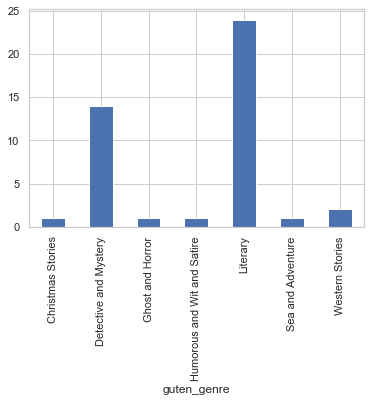

"\n\n#Plotting number of books per gerne \n\nbooks.groupby(['Author_Name','guten_genre'])['FileNo'].count().plot(kind = 'bar')\nplt.show()\n\n#stacked bar graph\n\nbooks.groupby(['guten_genre','Author_Name']).size().unstack().plot(kind='bar',stacked=True)\nplt.show()\n"

<Figure size 432x288 with 0 Axes>

In [59]:
############################################################################
################## Importing Required Pacakges##############################
############################################################################

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import re
import os


""" This block is for EDA on the given data"""

####################Importing csv file with names and authors################

#Assuming File location is local "Need to change it"

#Getting data into dataframe

%time
data = pd.read_csv("master996.csv", delimiter=';',encoding= 'unicode_escape')

#Checking memory usage in detail with distribution of data
data.info(memory_usage="deep")

#Checking the first 5 lines of the file

print(data.head(5))

#Chcking the shape of the dataframe

data.shape

#Checking the count of the values in dataframe, should match wiht the file

data.count()

#Extracting the bookid into Dataframe column FileNo, book id pg10067- FileNo - 10067

data['FileNo'] = data['book_id'].str.replace(r'\D+', '').astype(int)

#Checkign the values

data.head(5)

#Checking Null Values

data.info() 

#There are no null values

#Getting list of gernes

print(data.guten_genre.value_counts().unique())

#Checking distribution of Gerne columns

data.guten_genre.describe()

#Getting distribution of authors

data.Author_Name.describe()

""" List is quite long"""

#Getting list of authors

# print(data.Author_Name.unique())


##################################### Trying some plots on the file ######################################

plt.figure(figsize=(18,5))

#See how much the Gernes are distributed
sns.countplot(data['guten_genre'])
plt.show()

"""Clearly Classes are imbalanced, Literarcy genre has higest values and Allegories almost have no books"""

#chekcing the actualy counts of each gerne

data.guten_genre.value_counts()


"""
Literary                       794
Detective and Mystery          111
Sea and Adventure               36
Love and Romance                18
Western Stories                 18
Humorous and Wit and Satire      6
Ghost and Horror                 6
Christmas Stories                5
Allegories                       2

"""

### Wordcloud to see most frequent author ###

stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(str(data['Author_Name']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

"""Looks like we have most fictions from Charles dickson and Stevenson"""


##################################  Here add more analysis and graphs for more insigths #####################
#############################################################################################################



# Add here number of books per author


#fig, ax = plt.subplots(figsize=(15,7))
#data.groupby(['Author_Name','guten_genre']).count()['book_id'].plot(ax=ax)





# Add here number of author per gerne



################################################################################################################
##################################Importing html content into pnadas and joining it wiht meta data##############

import glob

# Getting all files and its names into dict and then converting to dataframe"""

Content = {}

#Its placed in Books folder at local , need to change it later 
%timeit
files = glob.glob("Books_Test\*.html")
for f in files:
    with open(f,mode ='r', encoding = 'utf8') as myfile:
        Content[f]=myfile.read().replace("<br>", '\n')

#Can check for few files from below code        
"""for i in data:
    print(i, data[i])
"""
#Putting it in dataframe
df = pd.DataFrame.from_dict(Content,orient='index').reset_index()
#Renaming column names
df.columns = ['File_Name', 'Data']
#Adding FilNo column to join
df['FileNo'] = df['File_Name'].str.replace(r'\D+', '').astype(int)

df.info(memory_usage="deep")

left = df
right = data

#merging by matching the bookid, ignoring which files has not match
result = pd.merge(left, right , how='inner', on=['FileNo', 'FileNo'])

#Checking resulting dataframe
result.info()

#Dropping unnecessery columns

books=result.drop(['File_Name', 'book_id'], axis=1)
books.head(5)

# This is to see number of books per authors, but so many authors hence useless
#ax = sns.barplot(x = books['Author_Name'], y = books['FileNo'])

#Plotting number of authors per gerne

books.groupby('guten_genre')['Author_Name'].count().plot(kind = 'bar')
plt.show()
plt.clf()

""" most authors are in literacy it follows the pattern from number of books i.e. more numbe rof books in one gerne hence more number of authors in 1 gerne"""

"""

#Plotting number of books per gerne 

books.groupby(['Author_Name','guten_genre'])['FileNo'].count().plot(kind = 'bar')
plt.show()

#stacked bar graph

books.groupby(['guten_genre','Author_Name']).size().unstack().plot(kind='bar',stacked=True)
plt.show()
"""

#Since there are lot more number of authors hence its not useful to see it



In [3]:
###### Running NB without any feature engineering

X = books['Data']
y= books['guten_genre']
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv_fit=cv.fit_transform(X)
print(cv_fit[:,2])
#print(cv_fit[2563])
print(cv_fit.shape)
#new_x = X[0]
#new_x=cv.fit_transform(new_x)
#print(new_x)
from sklearn import preprocessing
from bs4 import BeautifulSoup
import string

# labeling the classes

le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

#print(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cv_fit,y, test_size = .3)
from sklearn.naive_bayes import MultinomialNB
sc = MultinomialNB().fit(X_train, y_train).score(X_test,y_test)
print("Score before any preprocessing is :"+str(sc))
print(type(X_test))

#With only randonly seelcted feature

#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .3)
#from sklearn.naive_bayes import MultinomialNB
bool_vect = [10]
indices = np.where(bool_vect)[0]
print(indices)
#out1 = M.tocsc()[:,indices]
new = MultinomialNB().fit(X_train.tocsc()[:,indices], y_train)
print("Score with only subset of features  is :" +str(new))



  (1, 0)	1
(18, 26662)
Score before any preprocessing is :0.3333333333333333
<class 'scipy.sparse.csr.csr_matrix'>
[0]
Score with only subset of features  is :MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


In [60]:
##################################### Pre-Processing of the html file content########################################

from sklearn import preprocessing
from bs4 import BeautifulSoup
import string

# labeling the classes

le = preprocessing.LabelEncoder()
books['guten_genre'] = le.fit_transform(books['guten_genre'])

#checking raw content
books['Data'].head(5)

#cleaning it with soup
books['Data']= [BeautifulSoup(text).get_text() for text in books['Data'] ]

#Make everything in lowe case
books['Data'] = books['Data'].apply(lambda x: x.lower())

#Remove puchtuation
books['Data'] = books['Data'].apply(lambda x: x.translate(str.maketrans('','', string.punctuation)))

#Remove Digits
books['Data'] = books['Data'].apply(lambda x: x.translate(str.maketrans('','', string.digits)))
books['Data'].str.strip()

books['Data'].head(5)

0    this edition first published \nthe text follow...
1    sir walter elliot of kellynch hall in somerset...
2    it was in the spring of the year  that all lon...
3    it was  pm on the afternoon of may   the lusit...
4    every one asks me what i think of everything s...
Name: Data, dtype: object

(44, 44485)


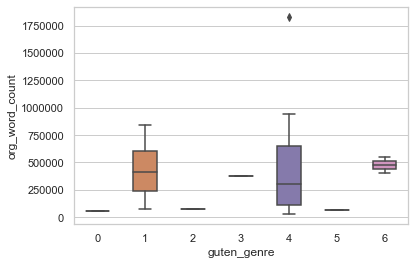

In [61]:
######################################## Changin into martix #########################################3

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
cv_fit=cv.fit_transform(books['Data'])

#Checking number of documetns and unique words in it

print(cv_fit.shape)

""" (5, 12526)"""

#String original length of each book
books['org_word_count'] = books['Data'].apply(len)
books

#Plotting the grpah for each gerne by original word count
sns.set(style="whitegrid")
#Bar Graph
#ax = sns.barplot(x="guten_genre", y="org_word_count", data=books)
ax = sns.boxplot(x="guten_genre", y="org_word_count", data=books, width=.5)

#Adding count of unique words in each book

#### In Prgoress . Priyam/ 05/04/2020


#books['uniq_cnt'] = cv.fit_transform(books['Data']).apply(lambda x: x.toarray().sum(axis=1))
#books['uniq_cnt'] = (lambda x: (cv.fit_transform(books['Data']).toarray().sum(axis=1)))
#books






Accuracy: 0.6666666666666666, Time duration: 9.131522417068481


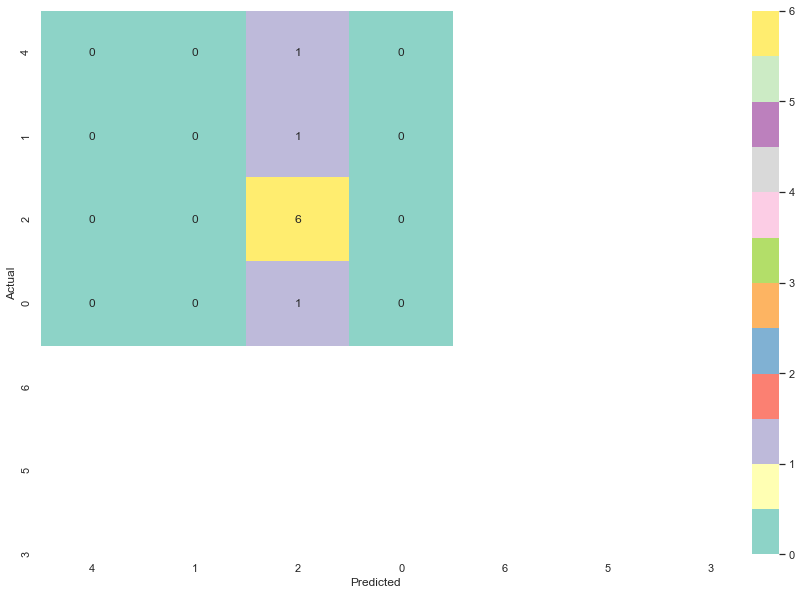

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         6
           5       0.00      0.00      0.00         1

    accuracy                           0.67         9
   macro avg       0.17      0.25      0.20         9
weighted avg       0.44      0.67      0.53         9

                   NaiveBayes
Accuracy                0.667
Balanced accuracy       0.250


C:\Users\priyam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
""" calling base line and balanced accuracy compariosn by making it in impbalance for better comparision"""

""" Making classification using pipline with only bag of words to check the under sampling effect"""

""" This fucntion basically cna be called from any pipline with hold out method, hence callling this for various sampling techniques"""

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
import time
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.metrics import balanced_accuracy_score

def eve_clf(classifier, X, y , df_scores, clf_name=None):
    start = time.time()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

    classifier.fit(X_train, y_train)
    end = time.time()
    acc =classifier.score(X_test, y_test)

    print("Accuracy: " + str(classifier.score(X_test, y_test)) + ", Time duration: " + str(end - start))
    y_pred = classifier.predict(X_test)
    conf_mat = confusion_matrix(y_test, y_pred)
    #balanced accuracy
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    clf_score = pd.DataFrame(
        {clf_name: [acc, bal_acc]},
        index=['Accuracy', 'Balanced accuracy']
    )
    
    # Plot confusion_matrix
    fig, ax = plt.subplots(figsize=(15, 10))
    sns.heatmap(conf_mat, annot=True, cmap = "Set3", fmt ="d",
    xticklabels=books.guten_genre.unique(), yticklabels=books.guten_genre.unique())
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    print(classification_report(y_test, y_pred))
    df_scores = pd.concat([df_scores, clf_score], axis=1).round(decimals=3)
    return df_scores

df_scores = pd.DataFrame()

#Calling with NB
trial1 = Pipeline([ ('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english'))), ('classifier', MultinomialNB())])


#It shall just give me over alla ccuracy and CM for bag of words approach in imbalaned data
df_scores=eve_clf(trial1, books.Data, books.guten_genre, df_scores,'NaiveBayes')
print(df_scores)

Accuracy: 0.7777777777777778, Time duration: 11.346649169921875


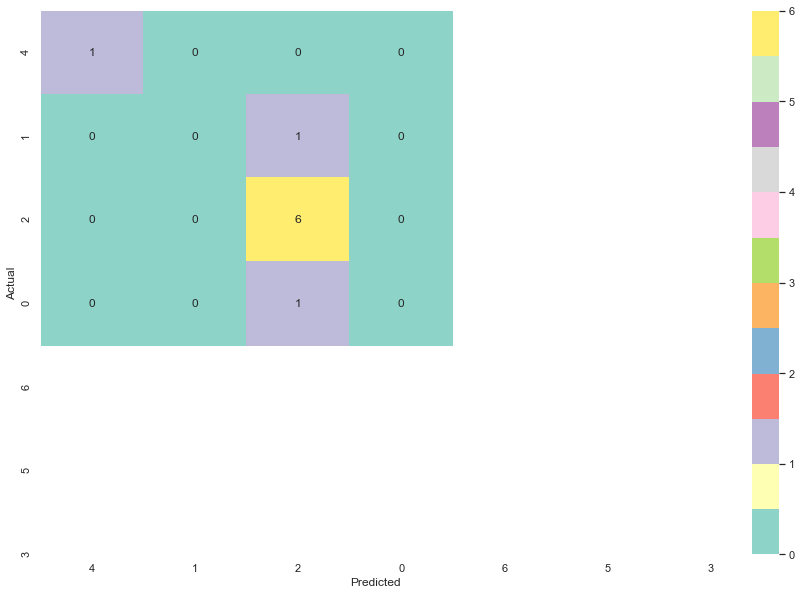

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         1
           4       0.75      1.00      0.86         6
           5       0.00      0.00      0.00         1

    accuracy                           0.78         9
   macro avg       0.44      0.50      0.46         9
weighted avg       0.61      0.78      0.68         9

                   NaiveBayes     LR
Accuracy                0.667  0.778
Balanced accuracy       0.250  0.500


C:\Users\priyam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
"""Calling it with logistic regression"""

from sklearn.linear_model import LogisticRegression

trial2 = Pipeline([ ('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english'))), ('classifier', LogisticRegression())])

#It shall just give me over alla ccuracy and CM for bag of words approach in imbalaned data
df_scores=eve_clf(trial2, books.Data, books.guten_genre, df_scores,'LR')
print(df_scores)

Accuracy: 0.7777777777777778, Time duration: 9.292531251907349


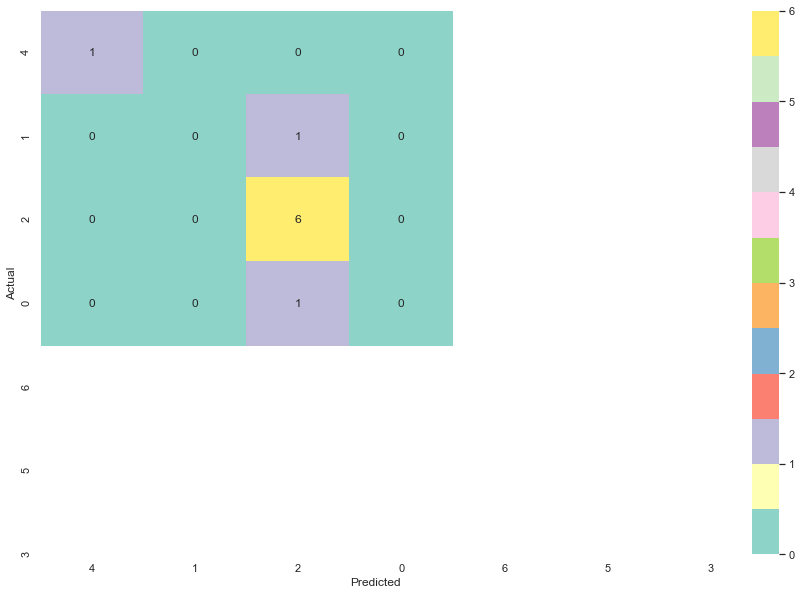

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         1
           4       0.75      1.00      0.86         6
           5       0.00      0.00      0.00         1

    accuracy                           0.78         9
   macro avg       0.44      0.50      0.46         9
weighted avg       0.61      0.78      0.68         9

                   NaiveBayes     LR  LR with weights
Accuracy                0.667  0.778            0.778
Balanced accuracy       0.250  0.500            0.500


C:\Users\priyam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
""" Logistic regression with weights balanced"""


# Using class_weights

trial3 = Pipeline([ ('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english'))), ('classifier', LogisticRegression(class_weight="balanced"))])

#It shall just give me over alla ccuracy and CM for bag of words approach in imbalaned data
df_scores=eve_clf(trial2, books.Data, books.guten_genre, df_scores,'LR with weights')
print(df_scores)

Accuracy: 0.0, Time duration: 8.124464750289917


C:\Users\priyam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


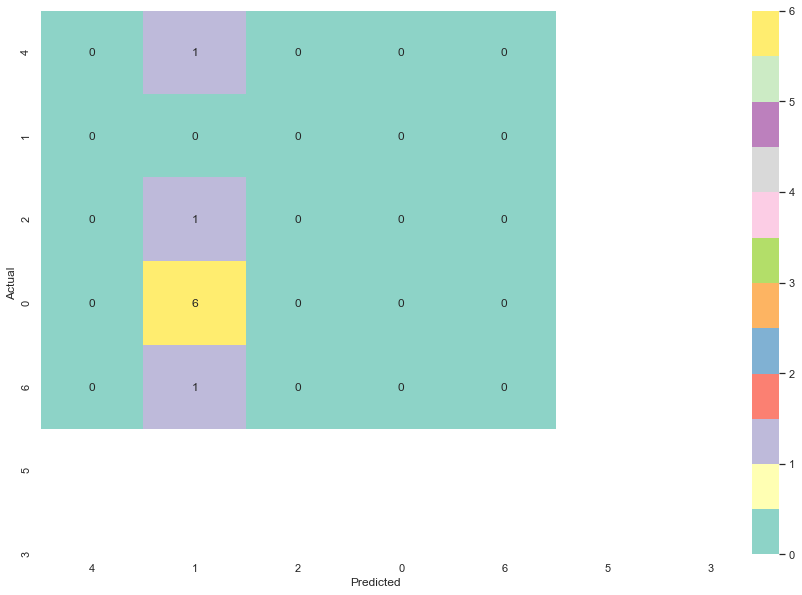

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       1.0
           4       0.00      0.00      0.00       6.0
           5       0.00      0.00      0.00       1.0

    accuracy                           0.00       9.0
   macro avg       0.00      0.00      0.00       9.0
weighted avg       0.00      0.00      0.00       9.0

                   NaiveBayes     LR  LR with weights  LR with weights  \
Accuracy                0.667  0.778            0.778            0.222   
Balanced accuracy       0.250  0.500            0.500            0.292   

                   LR with Random UnderSampling  
Accuracy                                    0.0  
Balanced accuracy                           0.0  


C:\Users\priyam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\priyam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
""" random under sampling"""

from imblearn.pipeline import make_pipeline as make_pipeline_with_sampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline as make_pipeline_imb

trial4 = make_pipeline_imb(TfidfVectorizer(stop_words=stopwords.words('english')),
                         RandomUnderSampler(),
                         LogisticRegression())
#It shall just give me over alla ccuracy and CM for bag of words approach in imbalaned data
df_scores=eve_clf(trial4, books.Data, books.guten_genre, df_scores,'LR with Random UnderSampling')
print(df_scores)

In [73]:
"Balanced Bagging"

#Need to do further  05/18

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from imblearn.ensemble import BalancedBaggingClassifier

from imblearn.pipeline import make_pipeline as make_pipeline_with_sampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline as make_pipeline_imb

trial4 = make_pipeline_imb(TfidfVectorizer(stop_words=stopwords.words('english')),
                           BalancedBaggingClassifier(base_estimator=HistGradientBoostingClassifier(random_state=42)))
#It shall just give me over alla ccuracy and CM for bag of words approach in imbalaned data
df_scores=eve_clf(trial4, books.Data, books.guten_genre, df_scores,'Balanced Bagging')
print(df_scores)

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

Counter({4: 24, 1: 14, 6: 2, 2: 1, 0: 1, 5: 1, 3: 1})
Accuracy: 0.6666666666666666, Time duration: 7.936453819274902


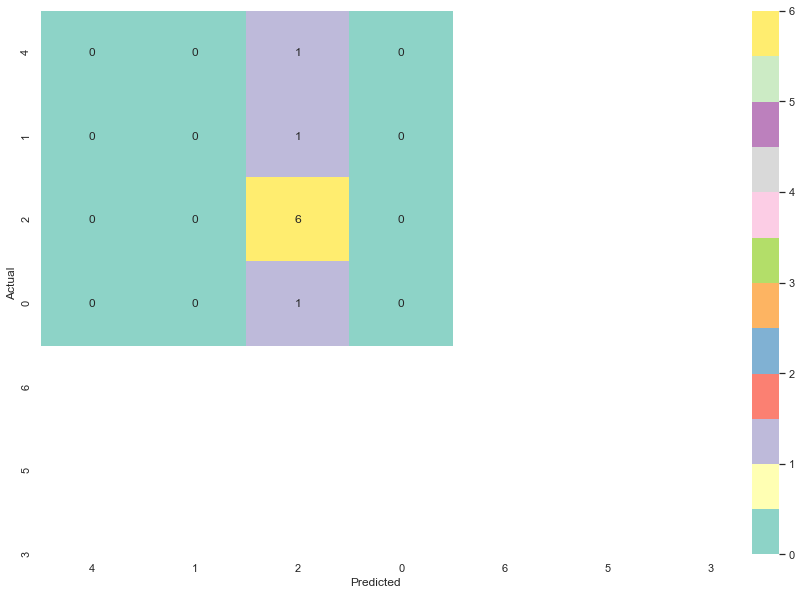

C:\Users\priyam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         6
           5       0.00      0.00      0.00         1

    accuracy                           0.67         9
   macro avg       0.17      0.25      0.20         9
weighted avg       0.44      0.67      0.53         9

                   NaiveBayes     LR  LR with weights  LR with weights  \
Accuracy                0.667  0.778            0.778            0.222   
Balanced accuracy       0.250  0.500            0.500            0.292   

                   LR with Random UnderSampling  LR with Random UnderSampling  \
Accuracy                                    0.0                         0.667   
Balanced accuracy                           0.0                         0.250   

                   LR with CondensedNN  LR with CondensedNN  \
Accuracy                         0.

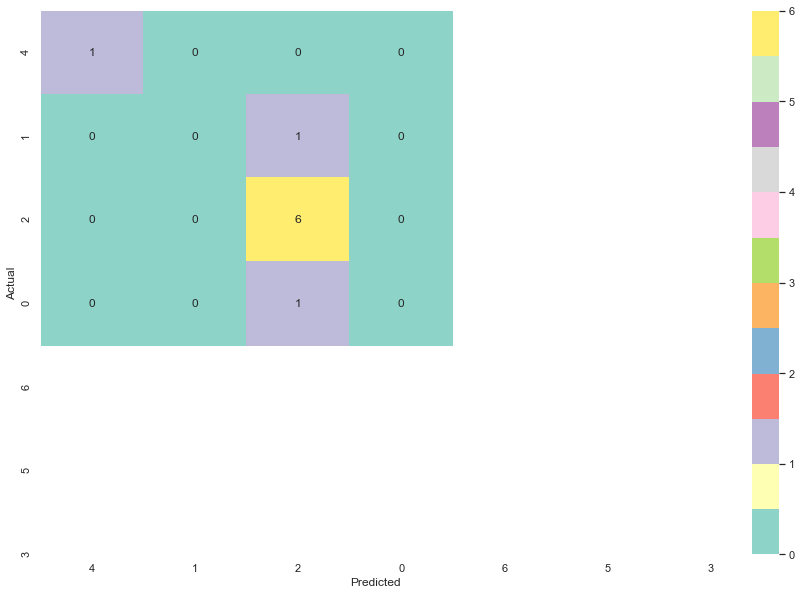

C:\Users\priyam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         1
           4       0.75      1.00      0.86         6
           5       0.00      0.00      0.00         1

    accuracy                           0.78         9
   macro avg       0.44      0.50      0.46         9
weighted avg       0.61      0.78      0.68         9

                   NaiveBayes     LR  LR with weights  LR with weights  \
Accuracy                0.667  0.778            0.778            0.222   
Balanced accuracy       0.250  0.500            0.500            0.292   

                   LR with Random UnderSampling  LR with Random UnderSampling  \
Accuracy                                    0.0                         0.667   
Balanced accuracy                           0.0                         0.250   

                   LR with CondensedNN  LR with CondensedNN  \
Accuracy                         0.

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 1, n_neighbors = 3

In [81]:
""" Methods for selecting which fetaures to keep in under sampling"""


# Undersample imbalanced dataset with NearMiss-3
from collections import Counter
from imblearn.under_sampling import NearMiss
from matplotlib import pyplot
from numpy import where
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours

# summarize class distribution
counter = Counter(y)
print(counter)


#condensed

n_c = make_pipeline_imb(TfidfVectorizer(stop_words=stopwords.words('english')),
                         CondensedNearestNeighbour(n_neighbors=1),
                         LogisticRegression())
#It shall just give me over alla ccuracy and CM for bag of words approach in imbalaned data
df_scores=eve_clf(n_c, books.Data, books.guten_genre, df_scores,'LR with CondensedNN')
print(df_scores)


#using Tomek Links
n_c = make_pipeline_imb(TfidfVectorizer(stop_words=stopwords.words('english')),
                         TomekLinks(),
                         LogisticRegression())
#It shall just give me over alla ccuracy and CM for bag of words approach in imbalaned data
df_scores=eve_clf(n_c, books.Data, books.guten_genre, df_scores,'LR with Tomek Links')
print(df_scores)



#this shall give accuracy on NearMiss3

n_3 = make_pipeline_imb(TfidfVectorizer(stop_words=stopwords.words('english')),
                         NearMiss(version=3, n_neighbors_ver3=3),
                         LogisticRegression())
#It shall just give me over alla ccuracy and CM for bag of words approach in imbalaned data
df_scores=eve_clf(n_3, books.Data, books.guten_genre, df_scores,'LR with NMiss3')
print(df_scores)

#Edited Nearest Neighbour

n_ENN = make_pipeline_imb(TfidfVectorizer(stop_words=stopwords.words('english')),
                         EditedNearestNeighbours(n_neighbors=3),
                         LogisticRegression())
#It shall just give me over alla ccuracy and CM for bag of words approach in imbalaned data
df_scores=eve_clf(n_3, books.Data, books.guten_genre, df_scores,'LR with ENN')
print(df_scores)


""" These needs to be tuned and tested on complete data

#this shall give accuracy on NearMiss2
n_2 = make_pipeline_imb(TfidfVectorizer(stop_words=stopwords.words('english')),
                         NearMiss(version=2, n_neighbors_ver3=3),
                         LogisticRegression())
#It shall just give me over alla ccuracy and CM for bag of words approach in imbalaned data
df_scores=eve_clf(n_2, books.Data, books.guten_genre, df_scores,'LR with NMiss2')
print(df_scores)

#this shall give accuracy on NearMiss1
n_1 = make_pipeline_imb(TfidfVectorizer(stop_words=stopwords.words('english')),
                         NearMiss(version=1, n_neighbors_ver3=3),
                         LogisticRegression())
#It shall just give me over alla ccuracy and CM for bag of words approach in imbalaned data
df_scores=eve_clf(n_1, books.Data, books.guten_genre, df_scores,'LR with NMiss1')
print(df_scores)

"""


## Need to run combination of these to select best undersampling technique

Next Steps are-
1. Run all these with complete data and document
2. decide on undersampling tehcniques
3. Check over sampling techniques like this one by one
4. find best over sampling combination on which fetaures to duplicate
5. check the matrix
6. try SMOTE on sparse data
7. finally try it in combination
8. decide the outcome to pass for feature enginerring


In [10]:
"""  older version but works"""

#Running NB without any feature engineering
X = books['Data'] 
y= books['guten_genre'] 
from sklearn.feature_extraction.text import CountVectorizer 
cv = CountVectorizer() 
cv_fit=cv.fit_transform(X) 
print("shape of original docs",cv_fit.shape)  
from sklearn import preprocessing 
from bs4 import BeautifulSoup 
import string

#labeling the classes
le = preprocessing.LabelEncoder() 
y = le.fit_transform(y) 
print("shape of y original is:", y.shape)

#print(y)

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(cv_fit,y, test_size = .3) 
from sklearn.naive_bayes import MultinomialNB 
sc = MultinomialNB()
c_score = sc.fit(X_train, y_train).score(X_test,y_test) 
print("Score before any preprocessing is :"+str(c_score))

#show the confusin matrix
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
y_pred = sc.predict(X_test)
print(classification_report(y_test, y_pred)) 
cm = confusion_matrix(y_test, y_pred) 
print(cm)

shape of original docs (18, 26662)
shape of y original is: (18,)
Score before any preprocessing is :0.8333333333333334
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           2       0.80      1.00      0.89         4
           3       0.00      0.00      0.00         1

    accuracy                           0.83         6
   macro avg       0.60      0.67      0.63         6
weighted avg       0.70      0.83      0.76         6

[[1 0 0]
 [0 4 0]
 [0 1 0]]


C:\Users\priyam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
